<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%ED%99%A9%EC%98%81%EC%88%99/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_AI_Expert_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Prompt Engineering Basics
- 프롬프트 엔지니어링으로 LLM 사용법 극대화하기
- LLM으로 어플리케이션 빠르게 구축하기
- 프롬프트 최적화, 추론, 문장변환, 활용


## Set-up

*  Load the API key and relevant Python libaries.


In [ ]:
!apt install python3.10-venv

In [ ]:
!python -m venv openai-env

In [ ]:
!source openai-env/bin/activate

In [ ]:
!pip install --upgrade openai

In [ ]:
## 본인의 openai api 키 입력
OPENAI_API_KEY = 'your OpenAI API key'

#### 공통으로 사용할 함수 정의

prompts 사용과  생성 결과를 살펴보는 것을 좀더 쉽게 할 수 있도록 공통의 함수를 정의

*  사용 모델: OpenAI `gpt-3.5-turbo` , 'gpt-4', model
*  chat completions endpoint (https://platform.openai.com/docs/guides/chat).



In [ ]:
from openai import OpenAI
import os
import time

client = OpenAI(api_key= OPENAI_API_KEY,
                organization=organization_id,
                project=project_id
                )

In [ ]:
def set_open_params(
    model="gpt-3.5-turbo",
    temperature=0.7,
    max_tokens=500,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
    """ set openai parameters"""

    openai_params = {}

    openai_params['model'] = model
    openai_params['temperature'] = temperature
    openai_params['max_tokens'] = max_tokens
    openai_params['top_p'] = top_p
    openai_params['frequency_penalty'] = frequency_penalty
    openai_params['presence_penalty'] = presence_penalty
    return openai_params




# Prompting Principles
- 질문은 명확하고 구체적

- 모델이 문맥을 이해할 수 있도록 필요한 배경 정보를 제공 해야함.

- 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제함.

- 열린 질문을 통해 모델이 자세하고 풍부한 답변을 제공하게 유도

- 얻고자 하는 정보나 결과의 유형을 정확하게 정의

- 대화의 맥락에 적합한 언어와 문자를 선택함

## Tactics

- Tactic 1: 구분 기호를 사용하여 입력의 고유한 부분을 명확하게 표시

    - 구분 기호는 어떤 것이 든 명확하게만 정의되면 돈다 즉,   ```, """, < >, `<tag> </tag>`, `:` 둥

- Tactic 2: 생성결과에 대한 출력 형식을 구조적으로 요청한다
    - JSON, HTML

- Tactic 3: 언어모델에게 조건들이 만족되었는지 체크하기



In [ ]:
# error, retry 추가
def get_completion(params, prompt, verbose=False):
    messages = [{"role": "user", "content": prompt}]

    time_start = time.time()
    retry_count = 3
    for i in range(0, retry_count):
        while True:
            try:

                response = client.chat.completions.create(
                    model = params['model'],
                    messages = messages,
                    temperature = params['temperature'],
                    max_tokens = params['max_tokens'],
                    top_p = params['top_p'],
                    frequency_penalty = params['frequency_penalty'],
                    presence_penalty = params['presence_penalty'],
                )

                answer = response.choices[0].message.content
                tokens = response.usage.total_tokens


                time_end = time.time()

                if verbose:
                    print('prompt: %s \n token: %d \n %.1fsec\n\n anwer : \n%s'%(prompt, tokens, (time_end - time_start), answer))
                return answer

            except Exception as error:
                print(f"API Error: {error}")
                print(f"Retrying {i+1} time(s) in 4 seconds...")

                if i+1 == retry_count:
                    return prompt, None, None
                time.sleep(4)
                continue

In [ ]:
params = set_open_params()
prompt = 'ChatGPT가 뭔지 20단어로 설명해주세요'

response = get_completion(params, prompt, verbose=True)


In [ ]:
# basic example
params = set_open_params()

prompt = "The sky is"
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

## Structured Output Formatting

In [ ]:
prompt = f"""
Generate a list of three made-up book titles along \
with their authors and genres.
Provide them in JSON format with the following keys:
book_id, title, author, genre.
"""
response = get_completion(params, prompt, verbose=True)


## Text Summarization Prompts

In [ ]:
text = f"""
You should express what you want a model to do by \
providing instructions that are as clear and \
specific as you can possibly make them. \
This will guide the model towards the desired output, \
and reduce the chances of receiving irrelevant \
or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. \
In many cases, longer prompts provide more clarity \
and context for the model, which can lead to \
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \
into a single sentence.
```{text}```
"""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)


## Question-and-Answering

In [ ]:
prompt = """Answer the question based on the context below. Keep the answer short and concise. Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical. There, scientists generated an early version of the antibody, dubbed OKT3. Originally sourced from mice, the molecule was able to bind to the surface of T cells and limit their cell-killing potential. In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:"""

params = set_open_params()
response = get_completion(params, prompt, verbose=True)


## Text Classification

In [ ]:
prompt = """Classify the text into neutral, negative or positive.

Text: I think the food was okay.

Sentiment:"""


params = set_open_params()
response = get_completion(params, prompt, verbose=True)

  ## Role Playing

In [ ]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""


params = set_open_params()
response = get_completion(params, prompt, verbose=True)

 ## Code Generation



*  SQL 쿼리 생성하기
*  주석을 프롬프트로 받아서 주석에 해당하는 내용을 코드로 작성하기



In [ ]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

In [ ]:
prompt="/* Ask the user for their name and say \"Hello\" */"
response = get_completion(params, prompt, verbose=True)

## Reasoning

In [ ]:
prompt = f"""
나는 시장에 가서 사과 10개를 샀어.
사과 2개를 이웃에게 주고, 2개를 수리공에게 주었어.
그리고 사과 5개를 더 사서 1개는 내가 먹었어.
나는 몇 개의 사과를 가지고 있었니?
"""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

# Prompt Engineering

- Few shot prompting
  - 문맥 내 학습(In Context Learning)이 가능한 기법
  - 모델에게 소수의 작업수행 예시를 제공하여 새로운 문제나 도메인에 적응하도록 함

- Chain-of-Thought
   - 복잡한 문제 해결 과정에서 단계별 추론을 사용하여 답변 퀄리티를 높이는 기법
   - 모델이 충분히 큰 LLM에서만 작동
   - CoT 설계시 질문을 단계별로 분해하고, 각 단계에서 필요한 정보와 추론 과정을 명시

   - “Let’s think step by step” , “단계별로 생각해 보자“ 문구 추가

- Prompt Chaining
    - 복잡한 문제를 해결하거나 분석할 때 사용하는 방법
    - 작업을 하위 작업으로 분할하여 이전 단계의 결과를 다음 단계의 입력으로 연속적으로 사용하여 프롬프트 작업의 연쇄를 만드는  것

- Generate Knowledge Prompting
    - 모델로부터 답을 얻어내기 전에 Few-shot Prompting으로 모델이 직접 관련 정보를 가져오도록 한 다음 , 이를 질문과 함께 활용해서 답을 생성하도록 하는 방법

- ReAct(Reason Act)
    - 언어모델이 문제를 해결하는 과정에서 추론과 행동을 결합하는 새로운 패러다임.
    - 작업을 위해 언어모델이 추론 추적과 취할 행동을 생성함으로써 행동계획을 생성, 유지 및 조정하는 동시에 외부 환경과의 상호작용을 통해  정보 검색 결과 등을 추가 정보를 도출하고,  추론에 추가 정보를 통합함.
        - 질문 (Question) : 사용자가 요청한 작업이나 해결해야 할 문제
        -  사고 (Thought) : 취할 행동 식별,  행동 계획의 생성/유지/조정 방법을 언어모델에 제시
        - 행동 (Action) : 사전 허용/정의 API 등 외부 환경(예: 검색 엔진)과 모델의 실시간 상호 작용
        - 관찰 (Observation) : 행동을 수행한 결과 출력




## Few Shot Prompting

- 주어진 텍스트에서 < 속성, 의견> 쌍을 추출하는 오피니언 마이닝

In [ ]:
prompt = """다음의 예시에서와 같이 주어진 텍스트에서 속성과 속성에 대한 의견을 추출해줘
예시1: 내 두피 상태에 맞춤형으로 원하는 향과 헤어케어에 도움이 되었다.
--> <두피, 맞춤형이다>, <향, 원한다>, <헤어케어, 도움된다>

예시2: 브랜드 이미지가 좋고 아파트주변 조경이 맘에든다.
--> <브랜드 이미지, 좋다>, <주변 조경, 좋다>

텍스트: 롯데캐슬이란 상호가 왠지 고급스럽게 느껴짐
"""

params = set_open_params()
response = get_completion(params, prompt, verbose=True)

## Prompt Chaining을 이용하여 복잡한 문제를 해결하기

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even."""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

In [ ]:
text = f"""
In a charming village, siblings Jack and Jill set out on \
a quest to fetch water from a hilltop \
well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled \
down the hill, with Jill following suit. \
Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, \
their adventurous spirits remained undimmed, and they \
continued exploring with delight.
"""
text1 = f"""
In 2024, Samsung demonstrated an artificial intelligence (AI) smart home robot called Ballie.
Ballie is a round helper on wheels that has a projector for a face.
The robot can help out at home by turning on smart appliances, beaming video calls and workout clips on to walls, and keeping an eye on pets while you are out.
It also uses AI to learn your habits and offer more personalization.
"""

# example 1
prompt_1 = f"""
Perform the following actions:
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into Korean.
3 - List each name in the Korean summary.
4 - Output a json object that contains the following \
keys: korean_summary, num_names.

Separate your answers with line breaks.

Text:
```{text1}```
"""
params = set_open_params()
response = get_completion(params, prompt_1, verbose=True)

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions:
1 - Summarize the following text delimited by
  <> with 1 sentence.
2 - Translate the summary into Korean.
3 - List each name in the Korean summary.
4 - Output a json object that contains the
  following keys: Korean_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Korean summary>
Output JSON: <json with summary and num_names>

Text: <{text1}>
"""
params = set_open_params()
response = get_completion(params, prompt_2, verbose=True)

성급하게 결론을 내리기 전에 모델에게 자체 솔루션을 찾도록 지시하기

In [ ]:
##

prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

params = set_open_params()
response = get_completion(params, prompt, verbose=True)

모델에게 먼저 모델의 자체 솔루션을 실행하도록 지시하여 문제를 해결

In [ ]:
# Prompt Chaining을 적용하며 단계적으로 솔루션을 구하며 문제를 해경하는 사례

prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem.
- Then compare your solution to the student's solution \
and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""

params = set_open_params()
response = get_completion(params, prompt, verbose=True)

## Chain-of-Thought

- Chain-of-Thought를 적용한 Reasoning

In [ ]:
prompt = f"""
나는 시장에 가서 사과 10개를 샀어.
나는 사과 2개를 이웃에게 주고, 2개를 수리공에게 주었어.
그리고 사과 5개를 더 사서 1개는 내가 먹었어.
사과가 몇 개나 남았니?
단계별로 생각해 보자.
"""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

- Few-Shot Chain-of-Thought

In [ ]:
prompt = f"""
    집합 {4, 8, 9, 15, 12, 2, 1}에서 홀수를 모두 더하면 짝수야.
    답변: 홀수(9, 15, 1)를 모두 더하면 25가 돼. 위의 명제는 거짓이야.

    집합 {17, 10, 19, 4, 8, 12, 24}에서 홀수를 모두 더하면 짝수야.
    답변: 홀수(17, 19)를 모두 더하면 36이 돼. 위의 명제는 참이야.

    집합 {16, 11, 14, 4, 8, 13, 24}에서 홀수를 모두 더하면 짝수야.
    답변: 홀수(11, 13)를 모두 더하면 24가 돼. 위의 명제는 참이야.

    집합 {17, 9, 10, 12, 13, 4, 2}에서 홀수를 모두 더하면 짝수야.
    답변: 홀수(17, 9, 13)를 모두 더하면 39가 돼. 위의 명제는 거짓이야.

    집합 {15, 32, 5, 13, 82, 7, 1}에서 홀수를 모두 더하면 짝수야.
    답변:
"""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)

## Generate Knowledge Prompting

In [ ]:
prompt = f"""
Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:
"""
params = set_open_params()
response = get_completion(params, prompt, verbose=True)


## 반복적인 Prompt Engineering을 통해 목표하는 Prompt 개발하기

In [ ]:
fact_sheet_chair = """
품명 및 모델명: 삼성전자 BESPOKE 그랑데 AI 원바디 Top Fit WF2420HCWWC 세탁기 WF24CB8750BW

개요
- 세탁기와 건조기를 하나로 완전히 새로워진 BESPOKE 그랑데 AI 원바디 Top-Fit. 심플한 플랫 디자인과 세탁기와 건조기가 하나로 합쳐진 원바디 디자인으로 어느 공간에도 잘 어울리는 BESPOKE 그랑데 AI 원바디 Top-Fit. 다양한 컬러로
취향에 따라 선택할 수 있고 플랫한 원바디 디자인과 다양한 BESPOKE 컬러로 취향에 따라 선택 가능합니다. 또한 기존 제품 대비 높이가 78mm 낮아지고, 심플한 원바디 디자인으로 낮은 높이의 공간에도 딱 맞춤.

용량
- 세탁기: 24kg
- 건조기: 20kg

에너지효율
- 1등급
- 24kg 세탁기 : 36.57 Wh/kg

설치지원방식: 방문설치

세탁기 품목: 드럼세탁기

설치 및 조작: 타워형
높이: 1,890mm

조작부
- 일체형 조작부로 올인원컨트롤(다이얼+터치)
- 스마트폰제어
- 스마트싱스

세탁건조방법: AI세탁, AI건조, 인버터건조모터

콘덴서관리: 수동

규격: 직렬: ±686x1890x872mm

출시가: 3,298,000원
"""

In [ ]:
prompt = f"""
귀하의 임무는 마케팅 팀이 기술 자료표를 기반으로 제품의 소매 웹사이트에 대한 설명을 작성하도록 돕는 것입니다.

세 개의 백틱으로 구분된 기술 사양에 제공된 정보를 기반으로 제품 설명을 작성합니다.

설명은 세탁기 소매업체를 대상으로 하므로 기술적인 내용이어야 하며 제품을 구성하는 재료에 중점을 두어야 합니다.

최대 50단어를 사용하세요.

기술 사양:```{fact_sheet_chair}```
"""
response = get_completion(params, prompt, verbose=True)
#print("Completion for Text 1:")

In [ ]:
prompt = f"""
귀하의 임무는 마케팅 팀이 기술 자료표를 기반으로 제품의 소매 웹사이트에 대한 설명을 작성하도록 돕는 것입니다.

세 개의 백틱으로 구분된 기술 사양에 제공된 정보를 기반으로 제품 설명을 작성합니다.

설명은 세탁기 소매업체를 대상으로 하므로 기술적인 내용이어야 하며 제품을 구성하는 세탁방식과 에너지 효율에 중점을 두어야 합니다.

설명 끝에는 기술 사양에 11자리 제품 ID를 모두 포함하세요.

설명 뒤에는 제품의 크기를 알려주는 표를 포함하세요. 테이블에는 두 개의 열이 있어야 합니다. 첫 번째 열에는 측정기준 이름이 포함됩니다. 두 번째 열에는 인치 단위로만 측정값이 포함됩니다.

표 제목에 '제품 크기'를 지정합니다.

웹사이트에서 사용할 수 있는 모든 것을 HTML로 포맷하세요.
설명을 <div> 요소에 배치하세요.

기술 사양:```{fact_sheet_chair}```
"""
response = get_completion(params, prompt, verbose=True)
#print("Completion for Text 1:")

Opinion Mining of multiple product reviews

In [ ]:
review_1 = f"""
디자인 좋구요, 크기도 적당하고 전반적으로 좋아요 다만, 건조기 사용후 시트향이 의류에 베질 않아 요. 시트를 많이 써도 향이 안나요. 방법이 없나요?
"""

review_2 = f"""
잘 도착했습니다.상품의 질이 좋네요.. 이 퀄리티에 이 가격이면가성비에 가심비에도 좋다고 생각합니다.또 이용하겠습니다. 항상 번창하시고 대박나는 해 보내세요.감사드리며, 많이 파세요.
"""
review_3 = f"""
일단 디자인 너무 이쁘고 신상품이라 사게 됏어요 가격 저렴한 대신 세제자동투입, 자동문열림 없지만 여태 통돌이 쓰던 저에겐 그런 거 없어도 문제 없네요 ㅎㅎ 딱 필요한 성능들로 구성되어 있어 너무 잘쓰고 있어요~ 설치기사님들도 너무 친절하시고 삼성최고예요
"""
review_4 = f"""
설치도 잘 해주시고 핸드폰과 연동해서 쓰는것도 잘 알려주셨어요.무엇보다 소리가 조용해서 소음걱정도 없고 좋아요.요즘 빨래할 맛납니다.^^
"""

reviews = [review_1, review_2, review_3, review_4]


In [ ]:
for i in range(len(reviews)):
    prompt = f""" 귀하의 임무는 다음의 예시에서와 같이 커머셜 웹사이트에서의 상품 리뷰에 대해 속성과 속성에 대한 의견을 추출하는 것입니다.
    예시1: 내 두피 상태에 맞춤형으로 원하는 향과 헤어케어에 도움이 되었다.
    --> <두피, 맞춤형이다>, <향, 원한다>, <헤어케어, 도움된다>

    리뷰: ```{reviews[i]}```
    """
    response = get_completion(params, prompt, verbose=True)


- 텍스트에 작업 순서를 기술하고 있는지 확인하고, 작업 순서가 있다면 작업순서를 순번과 함꼐 생성해주기

In [ ]:
 prompt = f"""
    다음의 상품 리뷰의 감성이 무엇인지 알려줘.

    대답은 "긍정" 또는 "부정" 또는 "중립"으로 해줘.

    리뷰: '''{review_1}'''
    """
 response = get_completion(params, prompt, verbose=True)

In [ ]:
prompt = f"""
Identify the following items from the review text:
- 감성분석 (긍정, 부정, 또는 중립)
- 리뷰어의 감정이 화가나 있는 상태인가? (true or false)
- 리뷰에서 주요하게 언급하는 제품의 속성과 표현을 추출해줘.(예: <디자인, 예쁘다>)

응답은 "Sentiment", "Anger", "Opinion Aspect"를 키로 하여 JSON 형태로 표현해줘.
만약에 정보가 주어지지 않은 경우에는 "알수없음"으로 표현해주고, 가능하면 짧게 대답해줘.

    리뷰: '''{review_1}'''
"""
response = get_completion(params, prompt, verbose=True)

In [ ]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \
water boiling. While that's happening, \
grab a cup and put a tea bag in it. Once the water is \
hot enough, just pour it over the tea bag. \
Let it sit for a bit so the tea can steep. After a \
few minutes, take out the tea bag. If you \
like, you can add some sugar or milk to taste. \
And that's it! You've got yourself a delicious \
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(params, prompt, verbose=True)
#print("Completion for Text 1:")
#print(response)

## ReAct(Reason + Act)

- reasoning trace와 task-specific action이 step-by-step으로 생성되면 더 좋은 성능을 낼 수 있다.
- thought-action-observation 순서로 agent가 액세스할 수 있는 도구를 정의 해야함
- tool_search : 구글 검색 엔진의 Search API를 활용하여 검색


# 구글 Search API Key 발급 받기

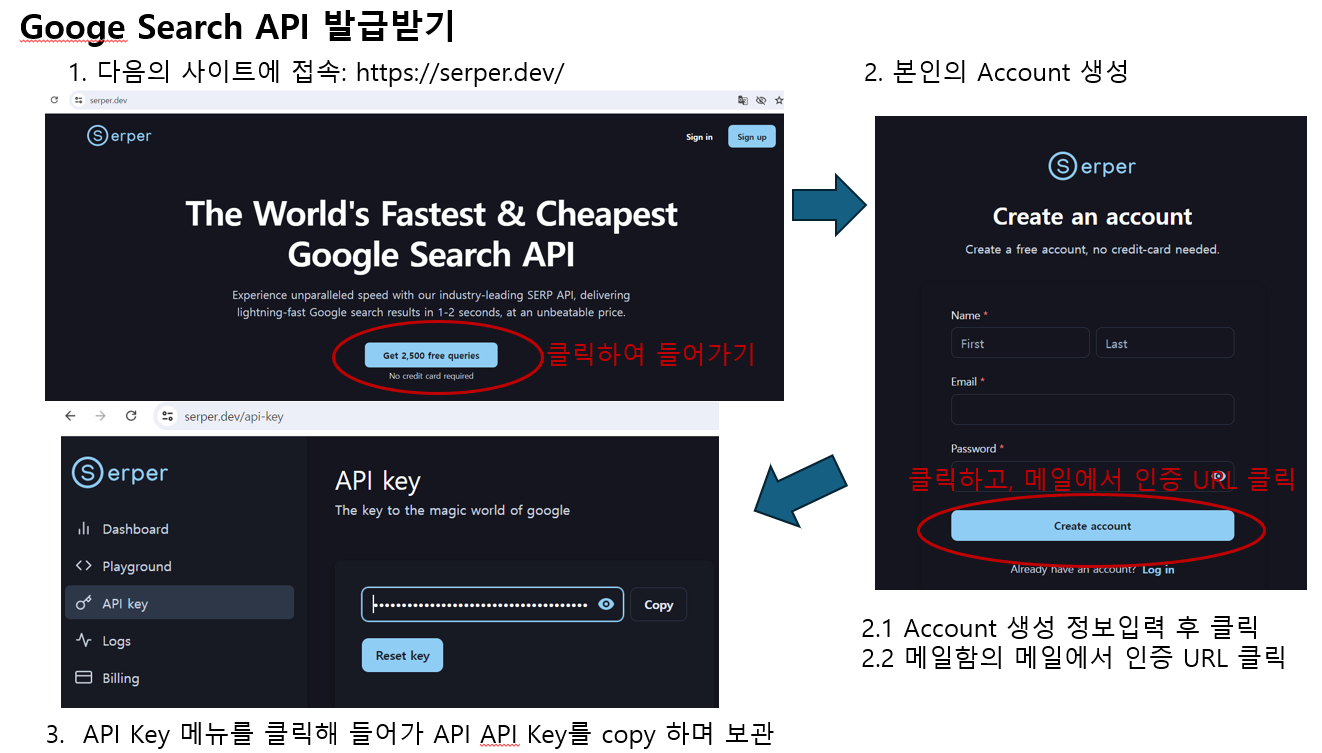

In [ ]:
%%capture
# update or install the necessary libraries
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install google-search-results

!pip install langchain-openai
!pip install langchain-community
!pip install langchainhub

# import libraries
from langchain.llms import OpenAI
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from dotenv import load_dotenv
load_dotenv()


In [ ]:
# 구글 SearchAPI API Key 등록
os.environ["SERPER_API_KEY"] = 'your Serper API key'

In [ ]:
## 본인의 openai api 키 입력
# OPENAI_API_KEY = 'your OpenAI API key'
client = OpenAI(api_key= OPENAI_API_KEY)

In [ ]:
def set_open_params(
    model="gpt-3.5-turbo",
    temperature=0.7,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
    """ set openai parameters"""

    openai_params = {}

    openai_params['model'] = model
    openai_params['temperature'] = temperature
    openai_params['max_tokens'] = max_tokens
    openai_params['top_p'] = top_p
    openai_params['frequency_penalty'] = frequency_penalty
    openai_params['presence_penalty'] = presence_penalty
    return openai_params


In [ ]:
tools = load_tools(["google-serper", "llm-math"], llm=client)
agent = initialize_agent(tools, client, agent="zero-shot-react-description", verbose=True)

In [ ]:
agent.run("Olivia Wilde의 남자 친구는 누구이니? 현재 그의 나이에 0.23 거듭제곱을 하면 얼마이니?")